In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
df= pd.read_csv('BaseMunicipioMensal.csv', sep= ';')
df.head(10)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12599,3306008,Três Rios,2025,5,2025m05,Interior,5,0,0,5,...,15,0,60,1,0,0,0,0,493,2
12600,3306107,Valença,2025,5,2025m05,Interior,4,0,0,4,...,9,0,32,1,0,0,0,0,257,2
12601,3306156,Varre-Sai,2025,5,2025m05,Interior,0,0,0,0,...,0,0,8,0,0,0,0,0,23,2
12602,3306206,Vassouras,2025,5,2025m05,Interior,0,0,0,0,...,3,0,17,1,0,0,0,0,131,2


In [19]:
df_carros= df.groupby('ano')['recuperacao_veiculos'].sum().reset_index()
df_carros['ano'] = df_carros['ano'].astype(str)
df_carros

,ano,recuperacao_veiculos
0,2014,25227
1,2015,23663
2,2016,28690
3,2017,37630
4,2018,36448
5,2019,26863
6,2020,15945
7,2021,13702
8,2022,13210
9,2023,14675


<function matplotlib.pyplot.show(close=None, block=None)>

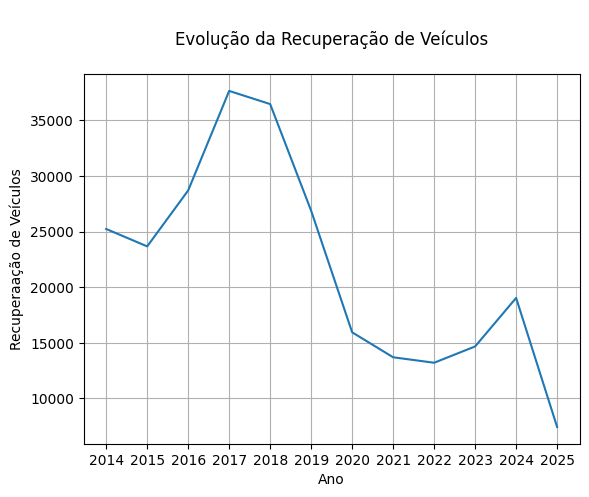

In [20]:
plt.plot(df_carros['ano'],df_carros['recuperacao_veiculos'])
plt.title('\nEvolução da Recuperação de Veículos\n')
plt.xlabel('Ano')
plt.ylabel('Recuperaação de Veículos')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

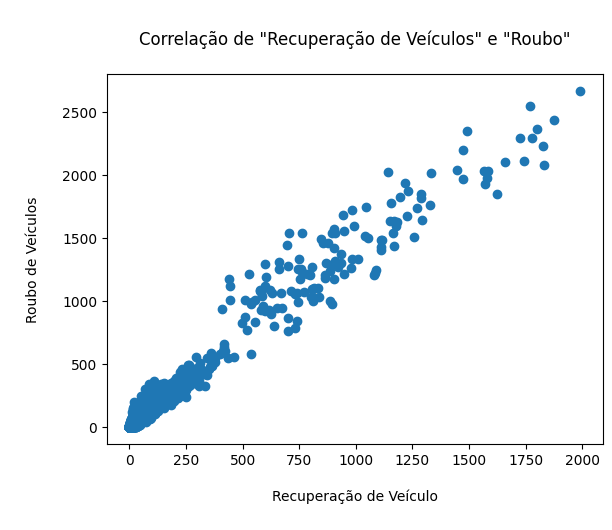

In [21]:
plt.scatter(df['recuperacao_veiculos'], df['roubo_veiculo'])
plt.title('\nCorrelação de "Recuperação de Veículos" e "Roubo"\n')
plt.xlabel('\nRecuperação de Veículo\n')
plt.ylabel('\nRoubo de Veículos\n')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

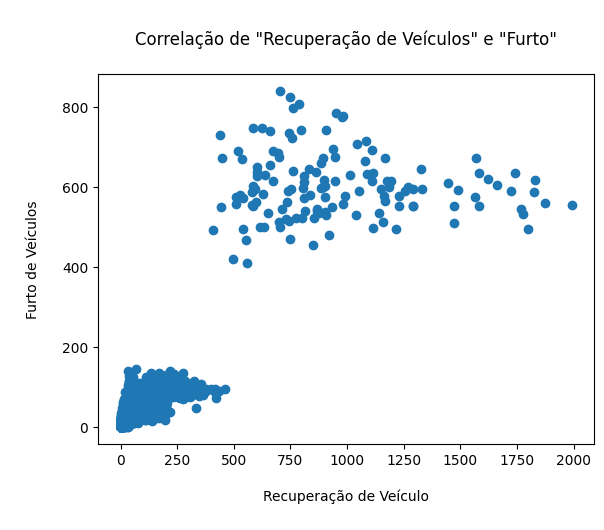

In [22]:
plt.scatter(df['recuperacao_veiculos'], df['furto_veiculos'])
plt.title('\nCorrelação de "Recuperação de Veículos" e "Furto"\n')
plt.xlabel('\nRecuperação de Veículo\n')
plt.ylabel('\nFurto de Veículos\n')
plt.show

In [23]:
municipios_baix = ['Belford Roxo', 'Duque de Caxias', 'Guapimirim', 'Itaguaí', 'Japeri', 'Magé', 'Mesquita', 'Nilópolis', 'Nova Iguaçu', 'Paracambi', 'Queimados', 'São João de Meriti', 'Seropédica']
df_baixada = df[(df['fmun'].isin(municipios_baix) & df['aaapai'])]


df_baixada= df_baixada.groupby('fmun')['aaapai'].sum().reset_index()
df_baixada = df_baixada.sort_values(by='aaapai', ascending= False)
df_baixada




,fmun,aaapai
8,Nova Iguaçu,1530
1,Duque de Caxias,1277
12,São João de Meriti,1061
0,Belford Roxo,767
6,Mesquita,396
5,Magé,351
7,Nilópolis,237
3,Itaguaí,229
10,Queimados,198
4,Japeri,149


In [24]:
dados= np.array(df_baixada['aaapai'])
q3= np.percentile(dados,75)
q3

np.float64(767.0)

In [25]:
maior25= df_baixada.loc[df_baixada['aaapai']>= q3]
maior25 = maior25.sort_values('aaapai', ascending=False)
maior25

,fmun,aaapai
8,Nova Iguaçu,1530
1,Duque de Caxias,1277
12,São João de Meriti,1061
0,Belford Roxo,767


<function matplotlib.pyplot.show(close=None, block=None)>

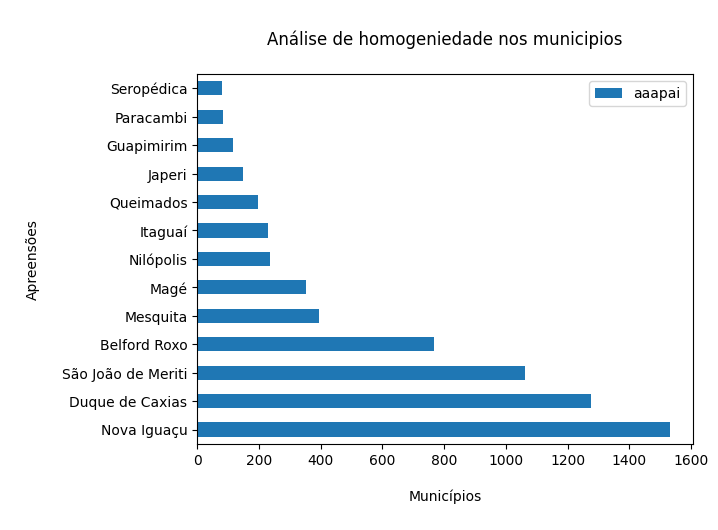

In [26]:
df_baixada.plot(kind= 'barh', x = 'fmun', y= 'aaapai')
plt.title('\nAnálise de homogeniedade nos municipios\n')
plt.xlabel('\nMunicípios\n')
plt.ylabel('\nApreensões\n')
plt.show


In [27]:
df2= pd.read_csv('BaseDP.csv', sep= ';', encoding='latin1') # importação de outra base 

df_estel_ano= df2.groupby('ano')['estelionato'].sum().reset_index()
df_estel_ano['ano'] = df_estel_ano['ano'].astype(str) # troca o tipo da variaável ano para int 
df_estel_ano

,ano,estelionato
0,2003,10715
1,2004,12584
2,2005,15886
3,2006,18294
4,2007,22498
5,2008,23685
6,2009,22019
7,2010,24053
8,2011,29246
9,2012,33563


In [28]:
df_estel= df2.groupby('cisp')['estelionato'].sum().reset_index()
dados_estel= np.array(df_estel['estelionato'])
q3= np.percentile(dados_estel,75)

In [29]:
maior_estel_25= df_estel.loc[df_estel['estelionato'] >= q3]
maior_estel_25= maior_estel_25.sort_values('estelionato', ascending=False)
maior_estel_25

,cisp,estelionato
12,16,39642
31,35,37030
28,32,31128
0,1,26991
52,59,25233
30,34,22691
57,64,21514
2,5,20928
8,12,20428
15,19,19818


In [41]:
regiao_lagos= ['Araruama', 'Armação dos Búzios', 'Arraial do Cabo', 'Cabo Frio', 'Iguaba Grande', 'São Pedro da Aldeia', 'Saquarema', 'Maricá']
crimes_violentos = ['hom_doloso', 'lesao_corp_morte' ,'latrocinio', 'cvli', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom' ,'lesao_corp_dolosa', 'estupro']

# filtra pelas colunas necessárias para a análise
df_lagos = df[(df['fmun'].isin(regiao_lagos))]
df_lagos= df_lagos.groupby('fmun')[crimes_violentos].sum().reset_index()
df_lagos


,fmun,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
0,Araruama,608,4,10,622,59,681,549,6075,520
1,Armação dos Búzios,160,2,3,165,21,186,207,2626,221
2,Arraial do Cabo,125,2,2,129,19,148,200,2004,150
3,Cabo Frio,1157,9,20,1186,139,1325,1243,9661,1169
4,Iguaba Grande,74,0,0,74,7,81,92,1491,146
5,Maricá,509,6,18,533,62,595,442,9127,805
6,Saquarema,300,3,13,316,28,344,345,4978,502
7,São Pedro da Aldeia,445,3,5,453,60,513,370,3842,444
